In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
plt.style.use(['classic'])

In [2]:
# Read in Revenue Files
file_2010 = "../../datasets/subsets/supp_ex/supp_ex_2010.csv"

supp_2010 = pd.read_csv(file_2010)
supp_2010 = supp_2010.set_index(['STNAME'])
supp_2010

,2010_E212,2010_E213,2010_E214,2010_E215,2010_E216,2010_E217,2010_E218,2010_E222,2010_E223,2010_E224,...,2010_E256,2010_E257,2010_E258,2010_E262,2010_E263,2010_E264,2010_E265,2010_E266,2010_E267,2010_E268
STNAME,,,,,,,,,,,,,,,,,,,,,
alabama,220488723,184476547,71493964,280776328,165131520,149547462,62316315,85123368,68865117,23191359,...,2591054,28081293.0,1005098,2623851.0,2420693.0,44556645.0,2321614.0,102694.0,32899.0,12467481
alaska,95734277,52637955,12806684,75052699,73973820,6539742,35131039,57222518,30263959,7999478,...,3112254,881388.0,2552213,699036.0,937807.0,1594375.0,202034.0,97588.0,19146.0,1192126
arizona,668304116,143684549,55706616,291270090,285247340,160075206,145323561,90869569,40678470,15432502,...,29557098,37906410.0,15331541,166015761.0,617284.0,14084639.0,3796531.0,20684173.0,4740376.0,116972608
arkansas,148990616,202960147,60390984,171815993,136138317,80375581,58876822,39778419,51935012,19632452,...,14933203,26643636.0,8632978,389568.0,4183023.0,8998587.0,534305.0,2224300.0,1094394.0,8623816
california,2027949626,2063980966,272519858,2707883115,2251783898,541300725,1355186206,664384854,683154304,108123418,...,39876486,54394672.0,37914004,301854.0,2461823.0,10959161.0,1752262.0,211580.0,105304.0,6609466
colorado,260010247,270814705,53039842,375110918,274723582,135569776,185876478,61025965,61123963,12094263,...,17433800,17608108.0,35004708,4050893.0,2997323.0,4572864.0,3276488.0,626892.0,157431.0,35316609
connecticut,355547687,149722949,89891269,340049560,291176470,26569799,98928319,139441128,56642141,38943095,...,25090172,1824001.0,6179027,1405946.0,2232680.0,4235978.0,1745798.0,2476017.0,665253.0,5706487
delaware,47162177,10671441,9582691,56766545,52523940,16049399,33558605,20624203,4637840,4060189,...,1350757,780225.0,52751,NaN,NaN,NaN,NaN,NaN,NaN,4360901
district of columbia,55398742,57226609,31672538,76356603,47340896,62866053,31776004,7679387,7694583,3892164,...,6589045,291792.0,3653975,1177247.0,3238653.0,4790979.0,2719073.0,9453403.0,9096991.0,1343261


In [3]:
(supp_2010.sum(axis=1)/1000000000).sort_values(ascending = False).head(5)

STNAME
california    20.970644
texas         14.878748
new york      14.402607
illinois       9.564660
new jersey     9.003733
dtype: float64

In [4]:
summary_2010 = pd.DataFrame(supp_2010.sum(axis=1)/100000000, columns=['Total SupportEx ($100M)'])
summary_2010['Salaries SupportEx ($100M)'] = supp_2010.iloc[:,0:7].sum(axis=1)/100000000
summary_2010['Benefits SupportEx ($100M)'] = supp_2010.iloc[:,7:14].sum(axis=1)/100000000
summary_2010['Services SupportEx ($100M)'] = supp_2010.iloc[:,14:21].sum(axis=1)/100000000
summary_2010['Supplies SupportEx ($100M)'] = supp_2010.iloc[:,21:28].sum(axis=1)/100000000
summary_2010['Property SupportEx ($100M)'] = supp_2010.iloc[:,28:35].sum(axis=1)/100000000
summary_2010['Other SupportEx ($100M)'] = supp_2010.iloc[:,35:42].sum(axis=1)/100000000
summary_2010

,Total SupportEx ($100M),Salaries SupportEx ($100M),Benefits SupportEx ($100M),Services SupportEx ($100M),Supplies SupportEx ($100M),Property SupportEx ($100M),Other SupportEx ($100M)
STNAME,,,,,,,
alabama,23.575837,11.342309,4.945917,2.709547,3.597177,0.335629,0.645259
alaska,8.718114,3.518762,2.148757,1.783694,1.119131,0.100349,0.047421
arizona,34.989370,17.496115,4.327348,5.378961,3.404346,1.113487,3.269114
arkansas,17.196773,8.595485,2.384349,2.736151,2.424401,0.795908,0.260480
california,209.706443,112.206044,41.581879,34.017477,20.202775,1.474255,0.224015
colorado,29.612317,15.551455,3.764144,6.009399,2.891233,0.886102,0.509985
connecticut,29.923749,13.518861,5.464221,7.714511,2.501748,0.539727,0.184682
delaware,5.415766,2.263148,1.008278,1.899944,0.159490,0.041297,0.043609
district of columbia,6.952520,3.626374,0.580694,1.679623,0.583176,0.164456,0.318196


In [5]:
summary_pct = pd.DataFrame(summary_2010['Salaries SupportEx ($100M)'] / summary_2010['Total SupportEx ($100M)'] *100, columns = ['Salaries (%)'])
summary_pct['Benefits (%)'] = summary_2010['Benefits SupportEx ($100M)'] / summary_2010['Total SupportEx ($100M)'] *100
summary_pct['Services (%)'] = summary_2010['Services SupportEx ($100M)'] / summary_2010['Total SupportEx ($100M)'] *100
summary_pct['Supplies (%)'] = summary_2010['Supplies SupportEx ($100M)'] / summary_2010['Total SupportEx ($100M)'] *100
summary_pct['Property (%)'] = summary_2010['Property SupportEx ($100M)'] / summary_2010['Total SupportEx ($100M)'] *100
summary_pct['Other (%)'] = summary_2010['Other SupportEx ($100M)'] / summary_2010['Total SupportEx ($100M)'] *100
summary_pct

,Salaries (%),Benefits (%),Services (%),Supplies (%),Property (%),Other (%)
STNAME,,,,,,
alabama,48.109887,20.978753,11.492898,15.257899,1.423614,2.736950
alaska,40.361505,24.647040,20.459628,12.836844,1.151045,0.543938
arizona,50.004086,12.367607,15.373128,9.729659,3.182358,9.343163
arkansas,49.983125,13.865094,15.910838,14.097998,4.628243,1.514702
california,53.506245,19.828613,16.221474,9.633836,0.703009,0.106823
colorado,52.516847,12.711412,20.293577,9.763617,2.992341,1.722206
connecticut,45.177696,18.260484,25.780561,8.360409,1.803676,0.617174
delaware,41.788141,18.617459,35.081728,2.944911,0.762538,0.805223
district of columbia,52.159140,8.352279,24.158479,8.387978,2.365423,4.576701


In [6]:
# Load in Dropout Rates
dropout_path = "../../datasets/subsets/success/success_df_2010.csv"

success_2010 = pd.read_csv(dropout_path)
success_2010

,STNAME,2010_DRP912,2010_DRP9,2010_DRP10,2010_DRP11,2010_DRP12,2010_DRPAM,2010_DRPAS,2010_DRPHI,2010_DRPBL,2010_DRPWH
0,alabama,1.799999,1.400000,2.000000,2.099998,1.799999,1.299999,1.400000,0.900000,2.000000,1.599999
1,alaska,6.899998,4.000000,5.500000,9.299995,8.699997,11.599998,3.500000,6.099998,6.399998,5.099998
2,arizona,7.799999,5.099998,5.699997,7.000000,13.599998,14.599998,4.899998,8.099998,8.799995,6.799999
3,arkansas,3.599998,1.900000,3.199999,4.399998,5.299999,4.899998,1.400000,4.099998,5.000000,3.099998
4,california,4.599998,2.599998,3.099998,4.199997,8.899994,6.500000,1.799999,5.799999,8.399994,2.799999
5,colorado,5.299999,3.099998,3.699999,5.299999,9.699997,10.099998,2.400000,9.899994,8.599998,3.199999
6,connecticut,3.000000,2.799999,2.599998,3.400000,3.199999,3.000000,1.099999,6.899998,6.799999,1.400000
7,delaware,3.900000,4.699997,3.699999,3.400000,3.500000,10.299995,3.199999,4.699997,4.899998,3.099998
8,district of columbia,7.000000,8.099998,5.899998,4.199997,4.000000,NaN,5.399998,8.299995,6.899998,4.899998
9,florida,2.299999,1.900000,2.199999,2.400000,2.799999,2.699999,0.800000,2.799999,3.500000,1.599999


In [7]:
summary_pct['Dropout Rate'] = ''

for i in range(len(success_2010)):
    summary_pct['Dropout Rate'][i] = success_2010['2010_DRP912'][i].astype(float)
    
summary_pct

C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Salaries (%),Benefits (%),Services (%),Supplies (%),Property (%),Other (%),Dropout Rate
STNAME,,,,,,,
alabama,48.109887,20.978753,11.492898,15.257899,1.423614,2.736950,1.8
alaska,40.361505,24.647040,20.459628,12.836844,1.151045,0.543938,6.9
arizona,50.004086,12.367607,15.373128,9.729659,3.182358,9.343163,7.8
arkansas,49.983125,13.865094,15.910838,14.097998,4.628243,1.514702,3.6
california,53.506245,19.828613,16.221474,9.633836,0.703009,0.106823,4.6
colorado,52.516847,12.711412,20.293577,9.763617,2.992341,1.722206,5.3
connecticut,45.177696,18.260484,25.780561,8.360409,1.803676,0.617174,3
delaware,41.788141,18.617459,35.081728,2.944911,0.762538,0.805223,3.9
district of columbia,52.159140,8.352279,24.158479,8.387978,2.365423,4.576701,7


In [8]:
summary_pct.sort_values(by=['Dropout Rate'], ascending = False)

,Salaries (%),Benefits (%),Services (%),Supplies (%),Property (%),Other (%),Dropout Rate
STNAME,,,,,,,
arizona,50.004086,12.367607,15.373128,9.729659,3.182358,9.343163,7.8
mississippi,48.876375,15.617153,24.248295,7.207586,3.461478,0.589112,7.4
district of columbia,52.159140,8.352279,24.158479,8.387978,2.365423,4.576701,7
alaska,40.361505,24.647040,20.459628,12.836844,1.151045,0.543938,6.9
new mexico,49.976517,16.022492,22.788874,10.134066,0.798498,0.279553,6.9
wyoming,51.910157,19.964252,10.312633,12.360843,4.948365,0.503750,6
colorado,52.516847,12.711412,20.293577,9.763617,2.992341,1.722206,5.3
hawaii,43.510926,18.418118,28.239250,9.237702,0.242024,0.351981,5.2
louisiana,47.965626,17.783287,21.657119,9.851007,1.421037,1.321925,4.8


In [9]:
summary_2010['Dropout Rate'] = ''

for i in range(len(success_2010)):
    summary_2010['Dropout Rate'][i] = success_2010['2010_DRP912'][i].astype(float)
    

summary_2010 = summary_2010[summary_2010['Dropout Rate'].notna()]
summary_2010['Dropout Rate'] = summary_2010['Dropout Rate'].astype(float)
summary_2010.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, alabama to wyoming
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Total SupportEx ($100M)     51 non-null     float64
 1   Salaries SupportEx ($100M)  51 non-null     float64
 2   Benefits SupportEx ($100M)  51 non-null     float64
 3   Services SupportEx ($100M)  51 non-null     float64
 4   Supplies SupportEx ($100M)  51 non-null     float64
 5   Property SupportEx ($100M)  51 non-null     float64
 6   Other SupportEx ($100M)     51 non-null     float64
 7   Dropout Rate                51 non-null     float64
dtypes: float64(8)
memory usage: 3.6+ KB


C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


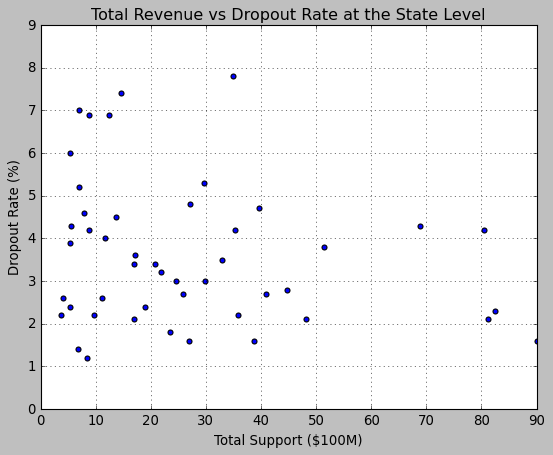

In [11]:
# Total Revenue and Dropout Rate
plt.scatter(summary_2010['Total SupportEx ($100M)'], summary_2010['Dropout Rate'])
plt.xlabel('Total Support ($100M)')
plt.xlim(left = 0, right = 90)
plt.ylabel('Dropout Rate (%)')
plt.title("Total Revenue vs Dropout Rate at the State Level")
plt.grid()

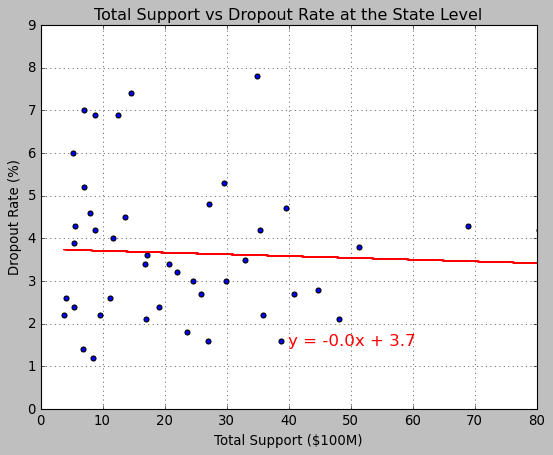

The correlation between both factors is -0.1048


In [12]:
# Total Support vs Dropout Rate
x_values = summary_2010['Total SupportEx ($100M)']
y_values = summary_2010['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,1.5),fontsize=15,color="red")
plt.xlabel('Total Support ($100M)')
plt.ylabel('Dropout Rate (%)')
plt.title('Total Support vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 80)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

In [13]:
summary_pct['Dropout Rate'] = ''

for i in range(len(success_2010)):
    summary_pct['Dropout Rate'][i] = success_2010['2010_DRP912'][i].astype(float)
    

summary_pct = summary_pct[summary_pct['Dropout Rate'].notna()]
summary_pct['Dropout Rate'] = summary_pct['Dropout Rate'].astype(float)
summary_pct.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, alabama to wyoming
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Salaries (%)  51 non-null     float64
 1   Benefits (%)  51 non-null     float64
 2   Services (%)  51 non-null     float64
 3   Supplies (%)  51 non-null     float64
 4   Property (%)  51 non-null     float64
 5   Other (%)     51 non-null     float64
 6   Dropout Rate  51 non-null     float64
dtypes: float64(7)
memory usage: 3.2+ KB


C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


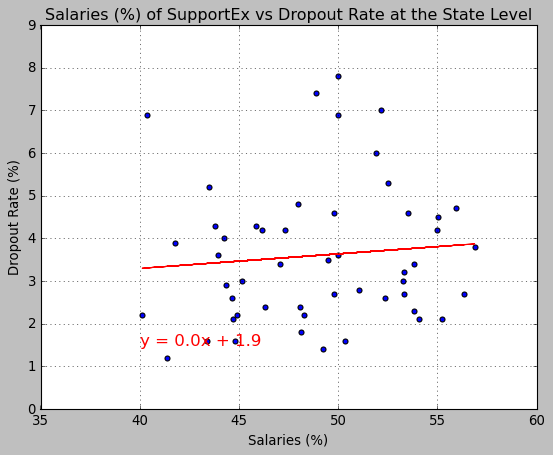

The correlation between both factors is 0.0939


In [14]:
# Salaries (%) vs Dropout Rate
x_values = summary_pct['Salaries (%)']
y_values = summary_pct['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,1.5),fontsize=15,color="red")
plt.xlabel('Salaries (%)')
plt.ylabel('Dropout Rate (%)')
plt.title('Salaries (%) of SupportEx vs Dropout Rate at the State Level')
plt.xlim(left = 35, right = 60)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

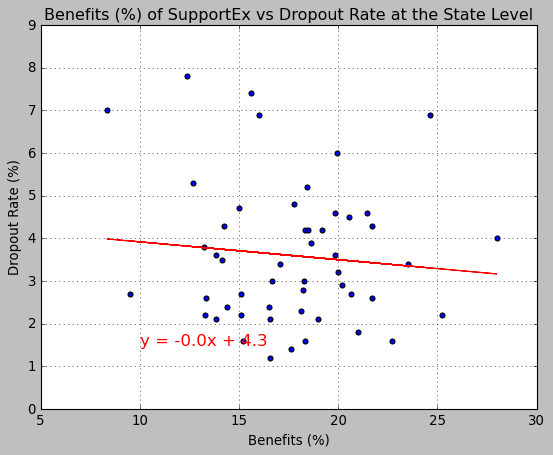

The correlation between both factors is -0.0987


In [15]:
# Benefits (%) vs Dropout Rate
x_values = summary_pct['Benefits (%)']
y_values = summary_pct['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,1.5),fontsize=15,color="red")
plt.xlabel('Benefits (%)')
plt.ylabel('Dropout Rate (%)')
plt.title('Benefits (%) of SupportEx vs Dropout Rate at the State Level')
plt.xlim(left = 5, right = 30)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

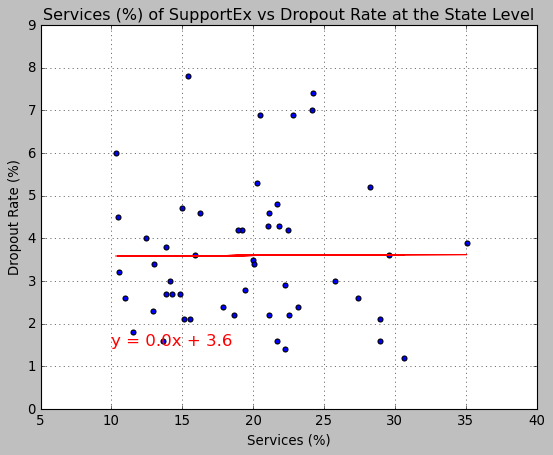

The correlation between both factors is 0.0048


In [16]:
# Services (%) vs Dropout Rate
x_values = summary_pct['Services (%)']
y_values = summary_pct['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,1.5),fontsize=15,color="red")
plt.xlabel('Services (%)')
plt.ylabel('Dropout Rate (%)')
plt.title('Services (%) of SupportEx vs Dropout Rate at the State Level')
plt.xlim(left = 5, right = 40)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

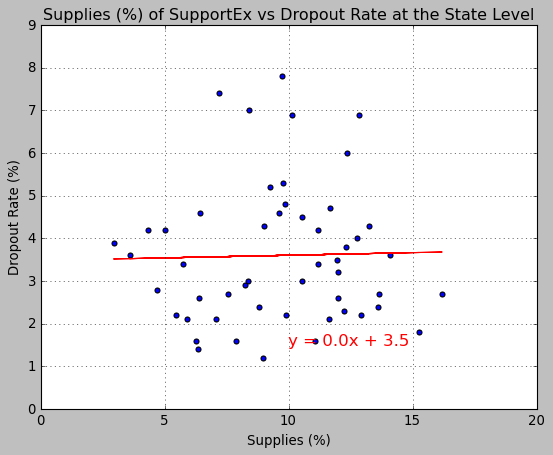

The correlation between both factors is 0.0237


In [17]:
# Supplies (%) vs Dropout Rate
x_values = summary_pct['Supplies (%)']
y_values = summary_pct['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,1.5),fontsize=15,color="red")
plt.xlabel('Supplies (%)')
plt.ylabel('Dropout Rate (%)')
plt.title('Supplies (%) of SupportEx vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 20)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

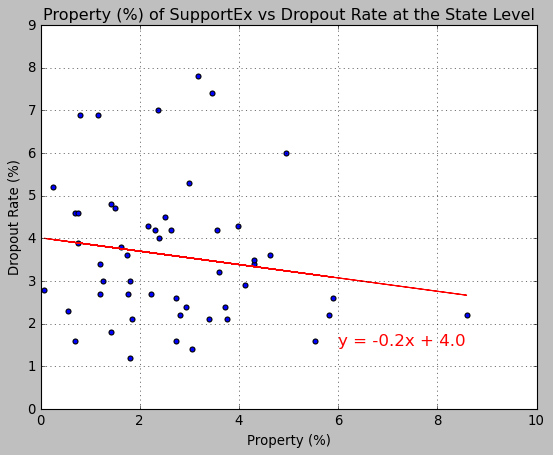

The correlation between both factors is -0.1612


In [18]:
# Property (%) vs Dropout Rate
x_values = summary_pct['Property (%)']
y_values = summary_pct['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,1.5),fontsize=15,color="red")
plt.xlabel('Property (%)')
plt.ylabel('Dropout Rate (%)')
plt.title('Property (%) of SupportEx vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 10)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

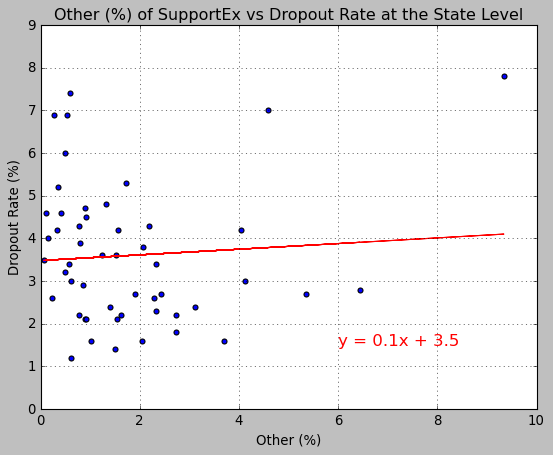

The correlation between both factors is 0.0717


In [19]:
# Property (%) vs Dropout Rate
x_values = summary_pct['Other (%)']
y_values = summary_pct['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,1.5),fontsize=15,color="red")
plt.xlabel('Other (%)')
plt.ylabel('Dropout Rate (%)')
plt.title('Other (%) of SupportEx vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 10)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")